In [13]:
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt
import pandas as pd


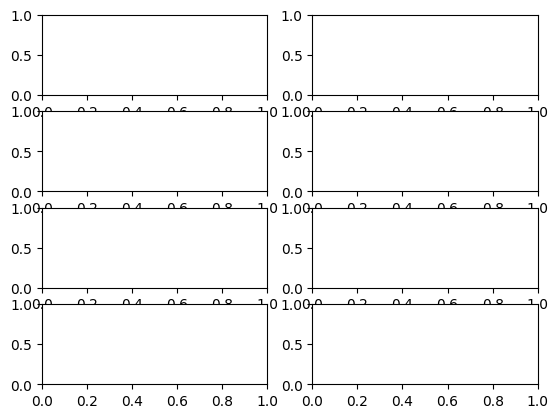

In [14]:
pop_sizes = [25, 50, 75, 100]
mut_probs = [0, 0.01, 0.03, 0.05]
cross_probs = [0,0.1,0.3,0.5]
tourn_sizes = [2,3,4,5]
figure, graphs = plt.subplots(4,2)

In [15]:
"""
graphs simulation results.

y: fitness, x: generation
defaults: pop size = 50, mutation: 0.01, crossover: 0.3, tournament: 2

results columns: iteration num,generation,avg fitness,best fitness,best genome,solved,num solutions,diversity,n,p_m,p_c,trn_size
"""
results = pd.read_csv("results.csv")

#graph populations
populations = []
populations.append(results[(results["n"] == 25 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
populations.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
populations.append(results[(results["n"] == 75 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
populations.append(results[(results["n"] == 100 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
pop_div = []



In [16]:
for population in enumerate(populations):        
    for iteration in population[1]["iteration num"]:
        x = population[1][population[1]["iteration num"] == iteration]["generation"]
        y = population[1][population[1]["iteration num"] == iteration]["avg fitness"]
        yb = population[1][population[1]["iteration num"] == iteration]["best fitness"]
        div = population[1][population[1]["iteration num"] == iteration]["diversity"]
        pop_div = []

        #plot population
        graphs[population[0],0].plot(x,y, alpha = 0.002)
        graphs[population[0],0].set(xlabel="generation")
        graphs[population[0],0].set(ylabel="population")
        graphs[population[0],0].set(title="Mutation "+str(pop_sizes[population[0]])+" Avg Fitnesses")

        graphs[population[0],1].plot(x,yb, alpha = 0.002)
        graphs[population[0],1].set(xlabel="generation")
        graphs[population[0],1].set(ylabel="population")
        graphs[population[0],1].set(title="Mutation "+str(pop_sizes[population[0]])+" Best Fitnesses")

plt.show()

In [17]:
#graph mutation
mutations = []
mutations.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.0) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
mutations.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
mutations.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.03) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
mutations.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.05) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])

mut_div = []

In [18]:
for mutation in enumerate(mutations):        
    for iteration in mutation[1]["iteration num"]:
        x = mutation[1][mutation[1]["iteration num"] == iteration]["generation"]
        y = mutation[1][mutation[1]["iteration num"] == iteration]["avg fitness"]
        yb = mutation[1][mutation[1]["iteration num"] == iteration]["best fitness"]
        div = mutation[1][mutation[1]["iteration num"] == iteration]["diversity"]
        mut_div.append(div)

        #plot population
        graphs[mutation[0],0].plot(x,y, alpha = 0.002)
        graphs[mutation[0],0].set(xlabel="generation")
        graphs[mutation[0],0].set(ylabel="mutation")
        graphs[mutation[0],0].set(title="Mutation "+str(mut_probs[mutation[0]])+" Avg Fitnesses")

        graphs[mutation[0],1].plot(x,yb, alpha = 0.002)
        graphs[mutation[0],1].set(xlabel="generation")
        graphs[mutation[0],1].set(ylabel="mutation")
        graphs[mutation[0],0].set(title="Mutation "+str(mut_probs[mutation[0]])+" Best Fitnesses")

        

plt.show()

In [ ]:
#graph crossover
crossovers = []
crossovers.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.0) & (results["trn_size"] == 2)])
crossovers.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.1) & (results["trn_size"] == 2)])
crossovers.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
crossovers.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.5) & (results["trn_size"] == 2)])
cros_div = []

In [ ]:
for crossover in enumerate(crossovers):        
    for iteration in crossover[1]["iteration num"]:
        x = crossover[1][crossover[1]["iteration num"] == iteration]["generation"]
        y = crossover[1][crossover[1]["iteration num"] == iteration]["avg fitness"]
        yb = crossover[1][crossover[1]["iteration num"] == iteration]["best fitness"]
        div = mutation[1][mutation[1]["iteration num"] == iteration]["diversity"]
        cros_div.append(div)

        #plot population
        graphs[crossover[0],0].plot(x,y, alpha = 0.002)
        graphs[crossover[0],0].set(xlabel="generation")
        graphs[crossover[0],0].set(ylabel="mutation")
        graphs[crossover[0],0].set(title="Mutation "+str(cross_probs[crossover[0]])+" Avg Fitnesses")

        graphs[crossover[0],1].plot(x,yb, alpha = 0.002)
        graphs[crossover[0],1].set(xlabel="generation")
        graphs[crossover[0],1].set(ylabel="mutation")
        graphs[crossover[0],0].set(title="Mutation "+str(cross_probs[crossover[0]])+" Best Fitnesses")

plt.show()

In [ ]:
#graph tournaments
tournaments = []
tournaments.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 2)])
tournaments.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 3)])
tournaments.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 4)])
tournaments.append(results[(results["n"] == 50 ) & (results["p_m"] == 0.01) & (results["p_c"] == 0.3) & (results["trn_size"] == 5)])
tourn_div = []

In [ ]:
for tournament in enumerate(tournaments):        
    for iteration in crossover[1]["iteration num"]:
        x = tournament[1][tournament[1]["iteration num"] == iteration]["generation"]
        y = tournament[1][tournament[1]["iteration num"] == iteration]["avg fitness"]
        yb = tournament[1][tournament[1]["iteration num"] == iteration]["best fitness"]
        div = mutation[1][mutation[1]["iteration num"] == iteration]["diversity"]
        tourn_div.append(div)

        #plot population
        graphs[tournament[0],0].plot(x,y, alpha = 0.002)
        graphs[tournament[0],0].set(xlabel="generation")
        graphs[tournament[0],0].set(ylabel="mutation")
        graphs[tournament[0],0].set(title="Mutation "+str(tourn_sizes[tournament[0]])+" Avg Fitnesses")

        graphs[tournament[0],1].plot(x,yb, alpha = 0.002)
        graphs[tournament[0],1].set(xlabel="generation")
        graphs[tournament[0],1].set(ylabel="mutation")
        graphs[tournament[0],0].set(title="Mutation "+str(tourn_sizes[tournament[0]])+" Best Fitnesses")

plt.show()

In [ ]:
#graph diversity
